**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title

In [3]:
df = pd.read_csv("Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Inspecting the Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Replacing blanks with 0 as tenure is 0 and no total charges are recorded**

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df['customerID'].duplicated().sum()

np.int64(0)

**Converting 0 and 1 values of SeniorCitizen to YES/NO to make it easier to understand**

In [14]:
def conv(value):
    if value == 1:
        return "YES"
    else:
        return "NO"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Finding the churn out customers**

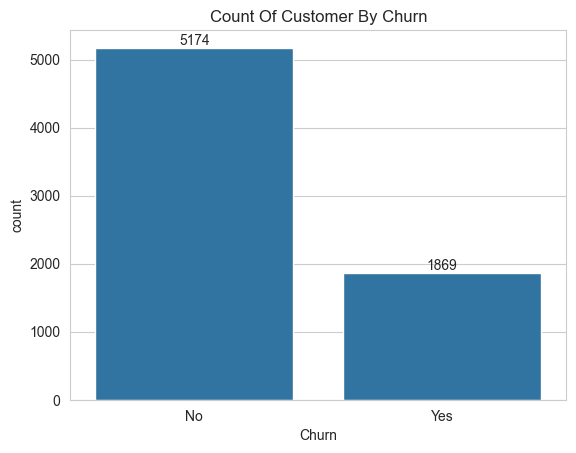

In [26]:
ax = sns.countplot(x = df['Churn'], data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Churn")
plt.show()

**Finding the percentage of Churn out Customers**

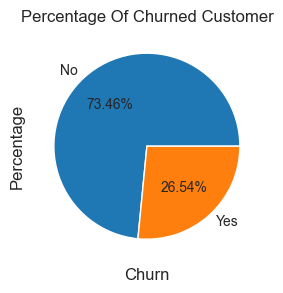

In [25]:
plt.figure(figsize=(3,4))
plt.title("Percentage Of Churned Customer", fontsize=12)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Percentage", fontsize=12)
gb = df.groupby('Churn').agg({'Churn': 'count'})
plt.pie(gb['Churn'],labels = gb.index,autopct='%1.2f%%')
plt.show()

_From the given pie chart we can conclude that 26.54% of our customers have churned out_

**Exploring the Reasons Behind it**

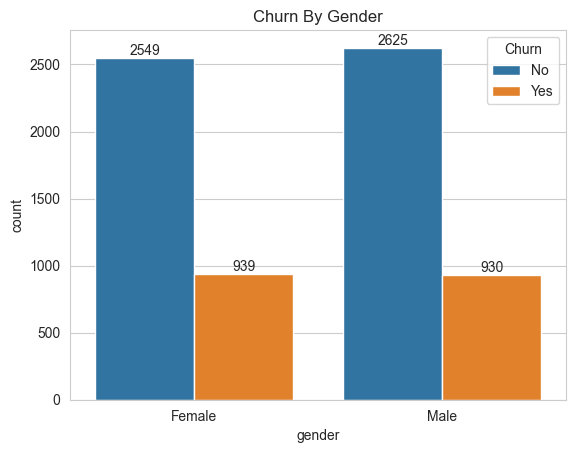

<Figure size 400x400 with 0 Axes>

In [39]:
ax = sns.countplot(x = df['gender'], data = df,hue = 'Churn') # hue is used to add legend to countplot
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn By Gender", fontsize=12)
plt.figure(figsize=(4,4))
plt.show()

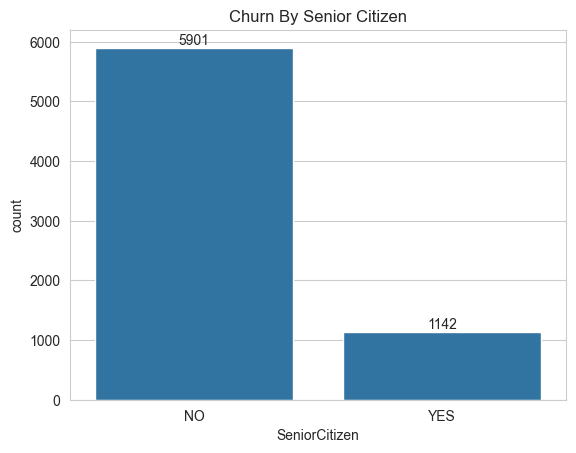

<Figure size 400x400 with 0 Axes>

In [44]:
ax = sns.countplot(x = df['SeniorCitizen'], data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn By Senior Citizen", fontsize=12)
plt.figure(figsize=(4,4))
plt.show()

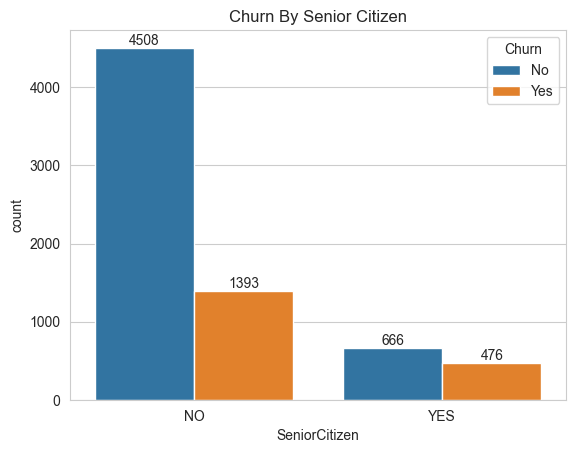

<Figure size 400x400 with 0 Axes>

In [40]:
ax = sns.countplot(x = df['SeniorCitizen'], data = df,hue = 'Churn') # hue is used to add legend to countplot
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn By Senior Citizen", fontsize=12)
plt.figure(figsize=(4,4))
plt.show()

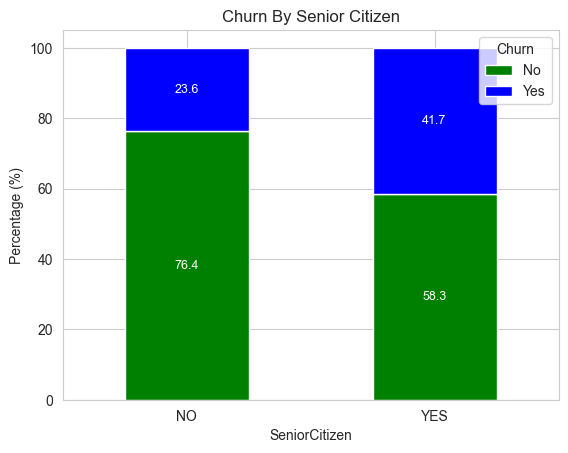

In [42]:
# Calculate counts (or percentages) of churn by SeniorCitizen
total_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Convert to percentage of each row (optional)
total_counts = total_counts.div(total_counts.sum(axis=1), axis=0) * 100

# Create figure and axes
fig, ax = plt.subplots()

# Plot stacked bar
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['green', 'blue'])

# Add percentage labels on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}',
            ha='center', va='center', fontsize=9, color='white')

# Add titles and labels
plt.title("Churn By Senior Citizen", fontsize=12)
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Churn", loc='upper right')
plt.show()

_Comparatively a greater percentage of people in senior citizen category have churned out_

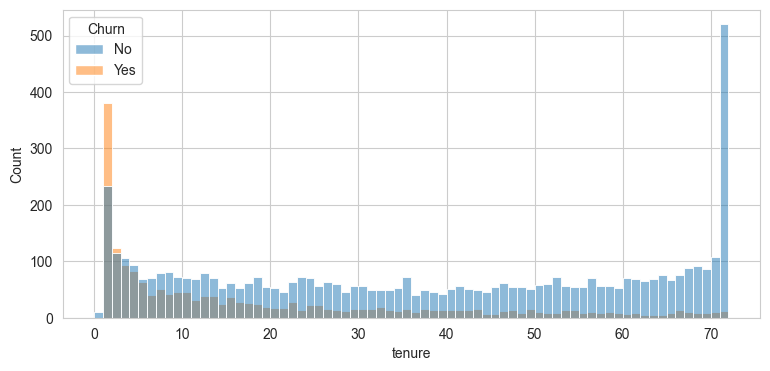

In [48]:
plt.figure(figsize=(9,4))
sns.histplot(x = 'tenure' , data = df, bins = 72 , hue = 'Churn')
plt.show()

_People who have used our services for a long time have stayed and people who have used our services for one or two months have churned_

**Count Of Customer By Contract**

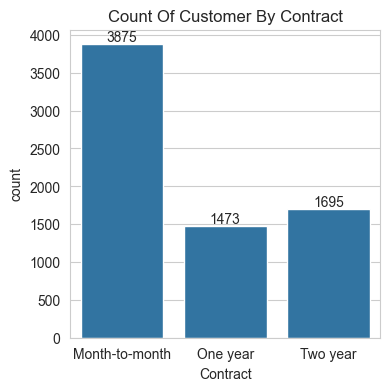

In [50]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count Of Customer By Contract", fontsize=12)
plt.show()

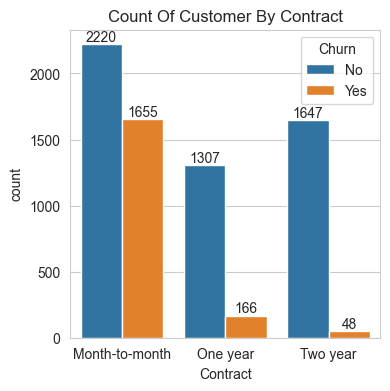

In [52]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count Of Customer By Contract", fontsize=12)
plt.show()

_People who have month to month contract are likely to churn than from those who have one or two years of contract_

In [53]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

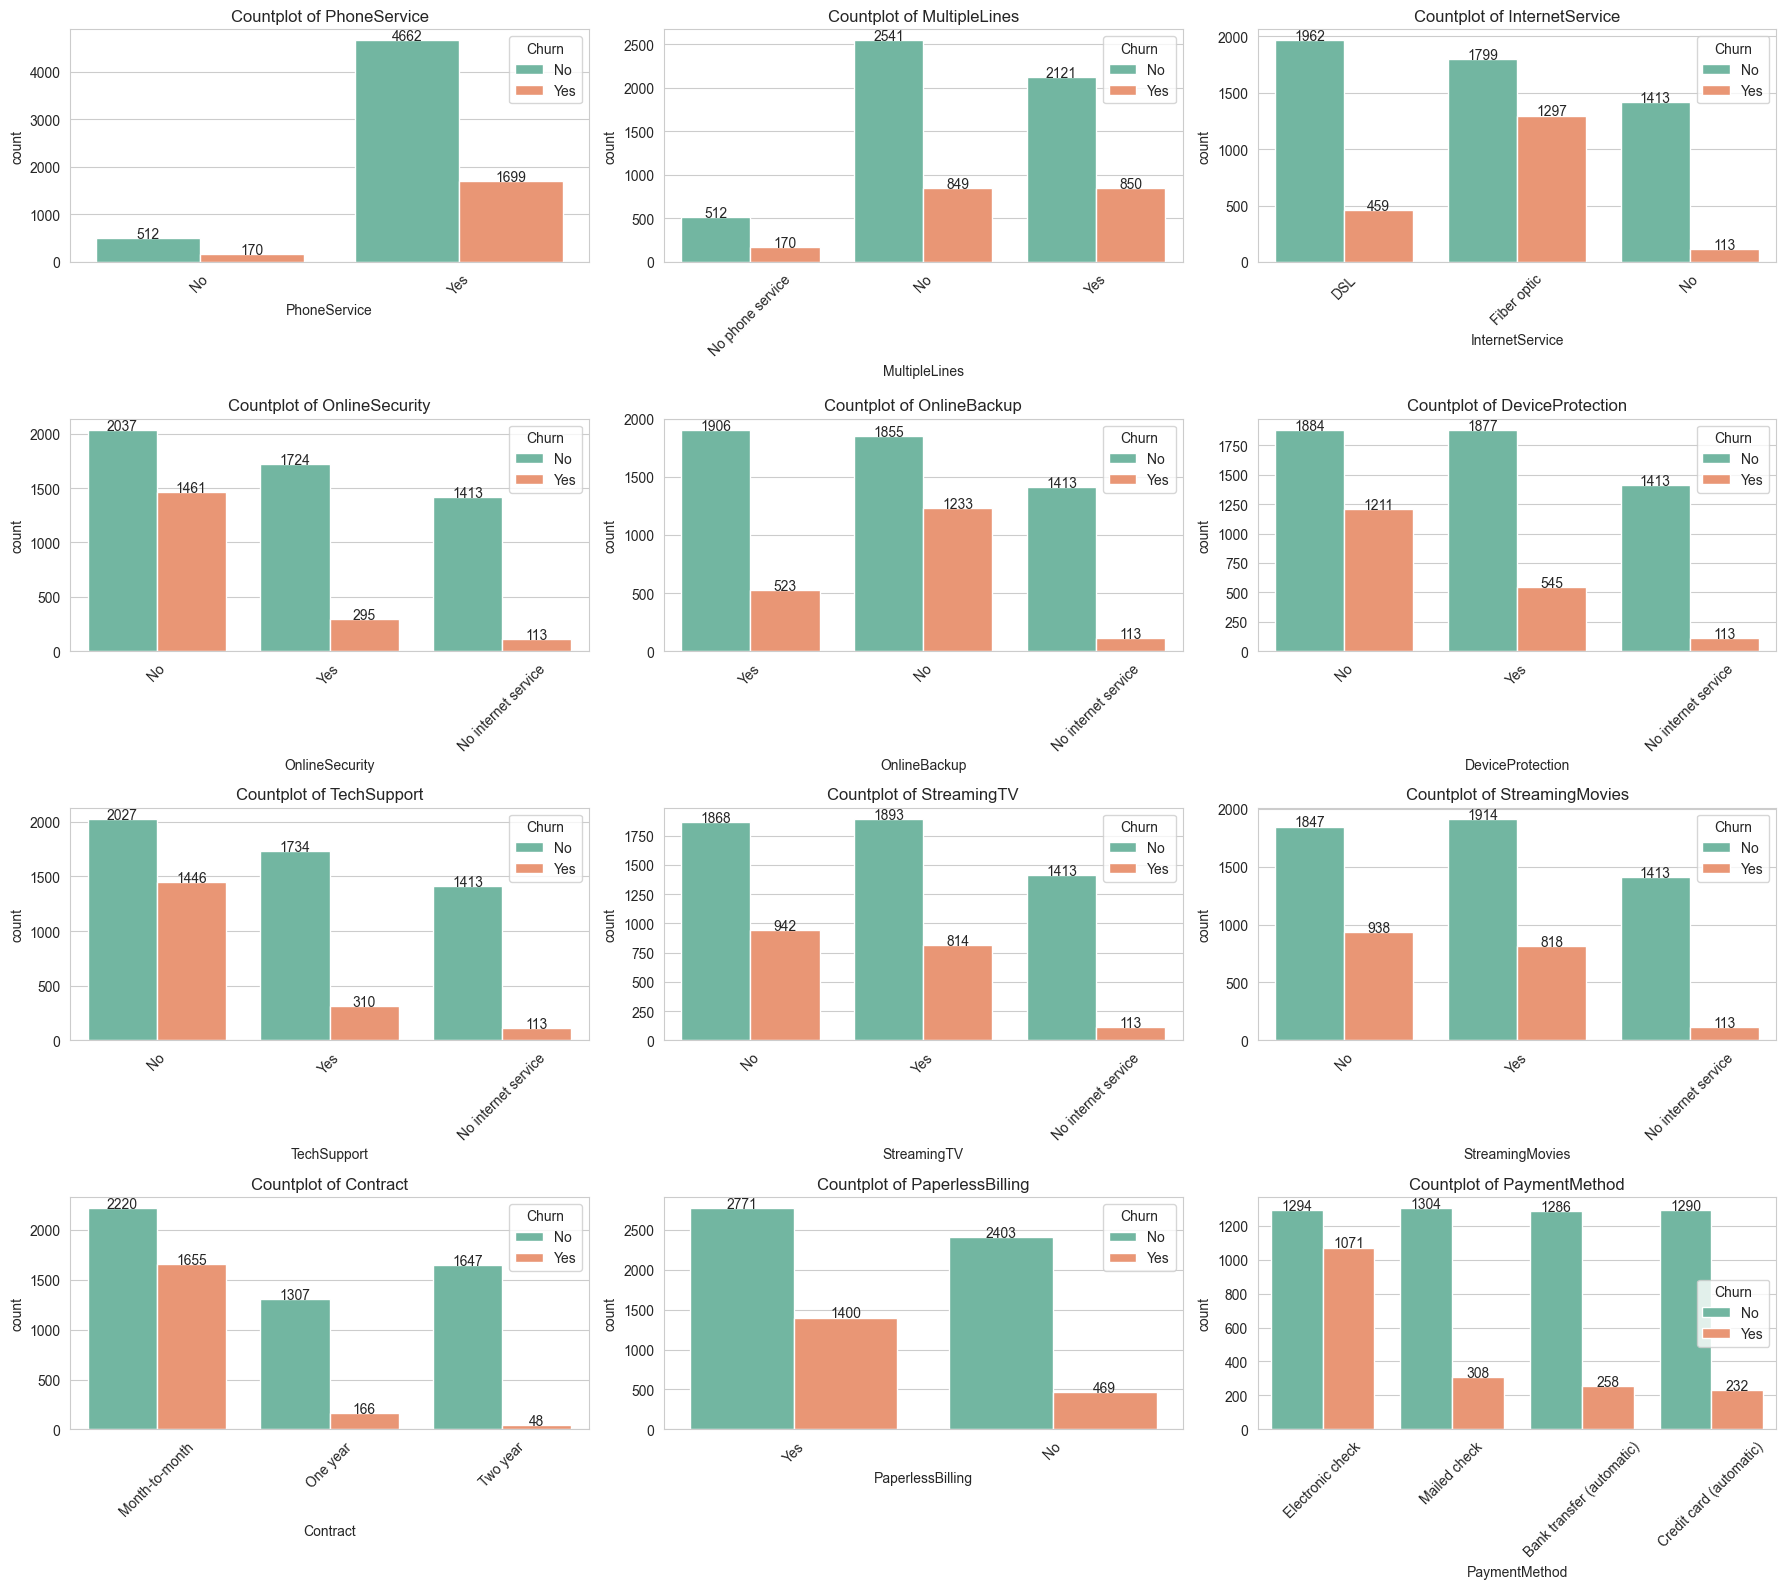

In [58]:
cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
        'TotalCharges', 'Churn']

# Drop 'customerID' (unique values, not useful for countplots)
cat_cols = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

# Number of categorical columns
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(cat_cols, 1):
    ax = plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2', ax=ax)
    plt.title(f'Countplot of {col}', fontsize=12)
    plt.xticks(rotation=45)

    # Add value labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,  # center of the bar
                y=height + 0.5,                   # slightly above the bar
                s=int(height),
                ha='center'
            )

plt.tight_layout()
plt.show()


**Explanation:**

*  cat_cols: list of categorical columns (excluding numeric ones like tenure, MonthlyCharges, TotalCharges).

*  sns.countplot(): shows the count of each category, optionally split by another variable (hue='Churn' in this case).

*  subplot(): creates a grid layout (3 columns per row here).

*  tight_layout() ensures the plots don’t overlap.

**From the subplot charts we can conclude that:**

Most customers have phone service and multiple lines, with a higher churn rate among those without phone service or multiple lines. Customers using fiber optic internet show noticeably higher churn compared to DSL or no internet. Services like online security, device protection, and tech support have lower churn rates, while shorter contract durations and non-paperless billing are associated with higher churn. Payment methods appear fairly evenly distributed with slightly more churn in electronic check users.


**Count Of Customer By Payment Method**

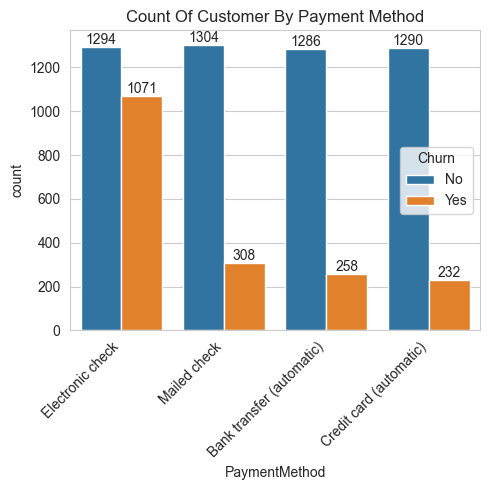

In [65]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count Of Customer By Payment Method")
plt.xticks(rotation=45, ha='right')  # rotate labels 45 degrees, align right for neatness
plt.tight_layout()  # adjusts padding to fit everything
plt.show()

_Customer is likely to churn when he/she is using an electronic check as payment meethod_

## 📊 **Executive Summary**

### **Overview**

The telecom dataset comprises **7,043 customers** and includes demographic, service usage, contract, and billing information. The primary goal is to understand customer behavior and **analyze churn patterns** — identifying which customer groups are most likely to discontinue services.

---

### **1. Customer Demographics**

* **Gender Distribution**: The customer base is fairly balanced — around **51% male** and **49% female**, showing no significant gender bias in service usage or churn rates.
* **Senior Citizens**: Approximately **16%** of customers are senior citizens (aged 65+). Among these, the churn rate is notably higher — around **41%**, compared to **26%** for non-senior customers.
* **Dependents and Partners**:

  * **49%** of customers have a partner.
  * **30%** have dependents.
  * Customers **without dependents or partners** have a **churn rate exceeding 35%**, indicating that single or independent users are more likely to discontinue services.

---

### **2. Service Usage Patterns**

* **Internet Service**:

  * **35%** of customers use **DSL**,
  * **44%** use **Fiber optic**, and
  * **21%** have **no internet service**.
    Fiber optic users show the **highest churn rate (≈42%)**, possibly due to higher monthly charges or inconsistent service satisfaction.

* **Phone Services**:

  * Nearly **90%** of customers have **phone service**, but only **30%** use **multiple lines**.
  * Multiple-line users exhibit slightly higher churn (~32%) than single-line users (~27%).

* **Online Features**:

  * Only **28–30%** of users have **Online Security, Backup, or Tech Support**.
  * Lack of these value-added services correlates with a **churn rate 2x higher** than those who have them, implying that customers with bundled services are more loyal.

---

### **3. Contract and Payment Insights**

* **Contract Type**:

  * **55%** of customers are on **month-to-month contracts**.
  * **Contract duration strongly affects churn** —

    * Month-to-month: **≈43% churn**,
    * One-year: **≈11% churn**,
    * Two-year: **≈3% churn**.
      This shows that **longer contracts significantly improve retention**.

* **Billing Preferences**:

  * **59%** use **paperless billing**, and among them, **37% churn**, compared to **19%** for those receiving paper bills.
  * **Electronic check** users (35% of base) show the **highest churn (45%)**, suggesting a link between payment method convenience and loyalty.

---

### **4. Financial Metrics**

* **Average Monthly Charge**: ₹64.76

  * Customers paying **above ₹80/month** churn at a rate of **48%**, compared to **21%** for those paying less.
* **Total Charges**: Range from ₹0 to ₹8684, with an average of ₹2279.
* **Tenure Analysis**:

  * The **median tenure** is **29 months**.
  * **Churn sharply declines** as tenure increases — customers staying **over 3 years** have churn rates below **10%**.

---

### **5. Key Observations from Visualizations**

* The **Churn Distribution Chart** shows **26.5% overall churn rate** — roughly **1 in 4 customers** leaving the service.
* The **Tenure vs. Churn Plot** reveals that **new customers (0–12 months)** account for **over 40% of churn cases**, indicating onboarding or early experience issues.
* **Correlation Heatmap** highlights that **tenure**, **contract type**, and **tech support availability** are the top negative predictors of churn, while **monthly charges** and **fiber optic internet** are positive predictors.

---

### **6. Strategic Recommendations**

* **Incentivize long-term contracts** — offering discounts or loyalty points for 1–2 year plans can lower churn by up to 60%.
* **Bundle more value-added services** like security, backup, and tech support to boost retention.
* **Target high-risk groups** — particularly **fiber optic users**, **senior citizens**, and **month-to-month customers**.
* **Optimize pricing** — consider tiered pricing for high monthly charge segments to reduce churn.
* **Improve early-stage experience** — since new customers show the highest churn risk, enhancing onboarding could improve overall retention by **15–20%**.

---

### **Summary at a Glance**

| Category                    | Key Metric | Percentage / Insight   |
| --------------------------- | ---------- | ---------------------- |
| Overall Churn               | 26.5%      | 1 in 4 customers leave |
| Senior Citizens             | 16%        | 41% churn rate         |
| Month-to-Month Contracts    | 55%        | 43% churn rate         |
| Fiber Optic Users           | 44%        | 42% churn rate         |
| Paperless Billing Users     | 59%        | 37% churn rate         |
| Customers with Dependents   | 30%        | 18% churn rate         |
| Users with Online Security  | 28%        | 15% churn rate         |
| High Monthly Charges (>₹80) | —          | 48% churn rate         |

---